## Bike sharing Assignment (__Multiple Linear Regression Assignment__)
                    - Kishore promod RB

1. About the company
- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.
- Bikes are available to take from "docks" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it.
- This bike can then be returned to another dock belonging to the same system.


### Objective 
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Business Goal:

You are required to model the demand for shared bikes with the available independent variables. 
It will be used by the management to understand how exactly the demands vary with different features. 
They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bike sharing dataset

In [6]:
#Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings ('ignore')

In [7]:
#Read the data
bikepd = pd.read_csv("day.csv")

In [8]:
#view the data

bikepd.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [110]:
#info of the data
bikepd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


__Observation__:

- 4 categorical variables
- 4 int variables
- 4 float variables

- No null values present in the datasets

In [10]:
bikedata = bikepd

In [11]:
# Converting the Categorical variables are = Season, weekday, weathersit
bikedata["season"] =  bikedata["season"].astype('category')
bikedata["weekday"] =  bikedata["weekday"].astype('category')
bikedata["weathersit"] =  bikedata["weathersit"].astype('category')
bikedata["mnth"] =  bikedata["mnth"].astype('category')

In [12]:
#check the datatypes
display(bikedata.dtypes)

instant          int64
dteday          object
season        category
yr               int64
mnth          category
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [13]:
#shape of the data
bikepd.shape

(730, 16)

In [14]:
#Checking the columns
bikedata.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
#dropping the unnecessary columns
bikedata.drop(['instant','dteday','casual','registered'],axis=1, inplace=True)

In [16]:
bikedata.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

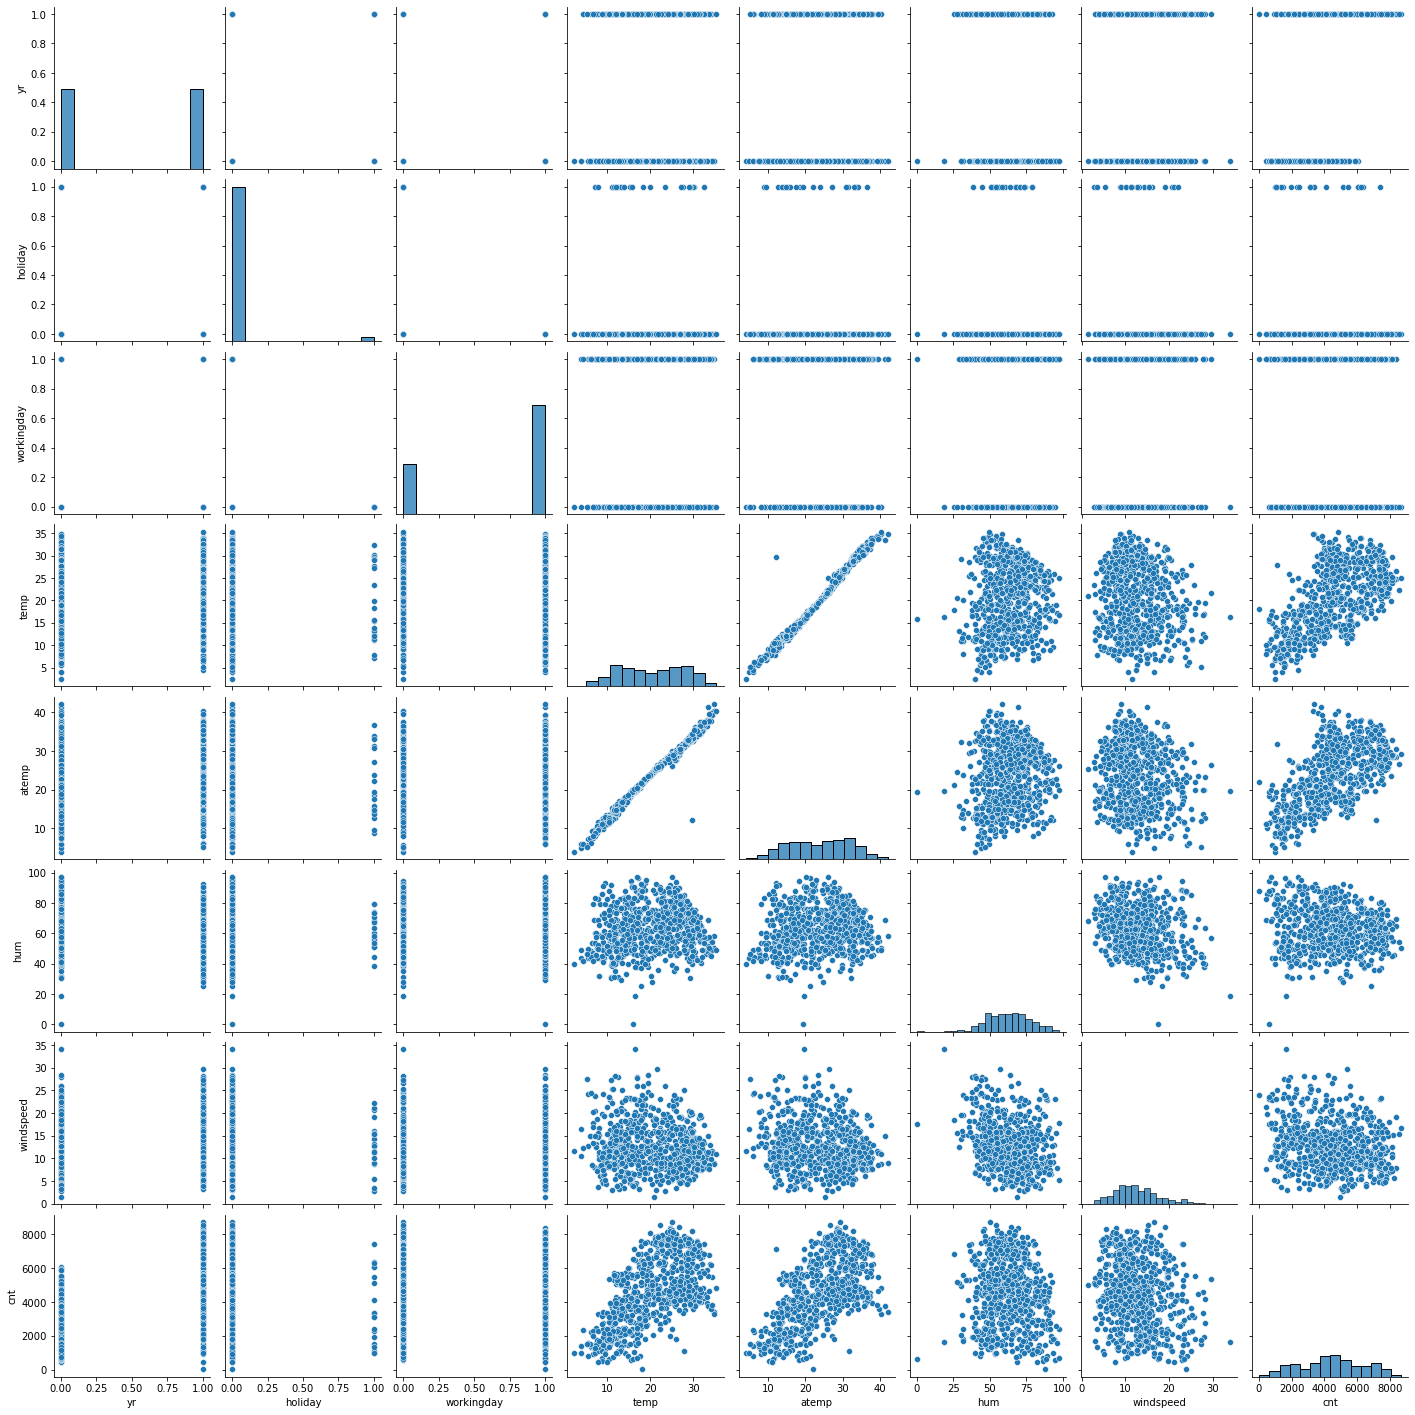

In [17]:
# numerical variable - visualization
sns.pairplot(bikedata)
plt.show()

__Observation__<br/>

- Pairplot shows temp and atemp are highly correlated
- High windspeed correlates with less count of bike rentals
- Casual and registered are not necessary 

- There is a __linear relationship__ between __temp (Temperature) and cnt__

In [18]:
bikedata.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

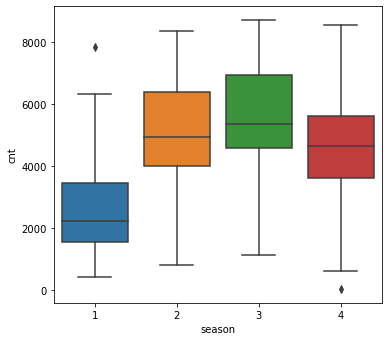

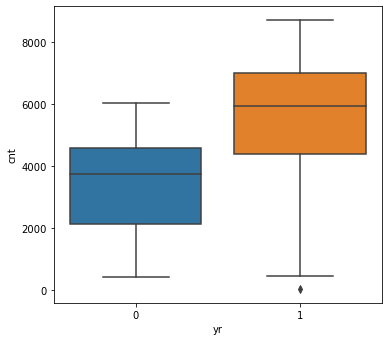

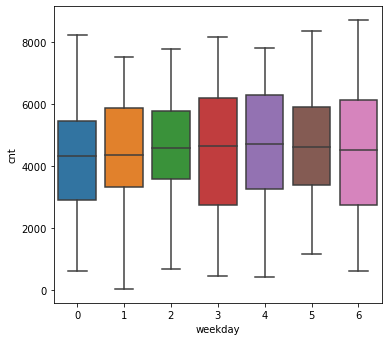

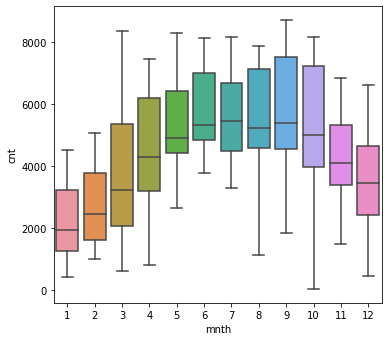

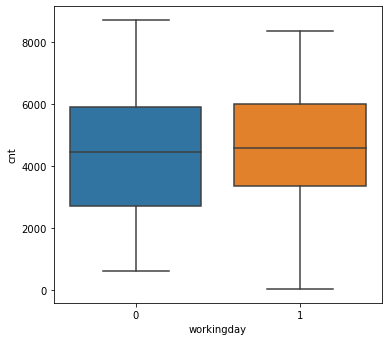

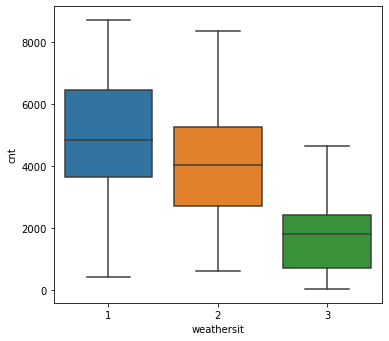

In [20]:
# Categorical varaibles - visualization

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikedata)


plt.figure(figsize=(20, 12))
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikedata)


plt.figure(figsize=(20, 12))
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikedata)


plt.figure(figsize=(20, 12))
plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikedata)


plt.figure(figsize=(20, 12))
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikedata)


plt.figure(figsize=(20, 12))
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikedata)
plt.show()

Refer:

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius

Text(0.5, 1.0, 'weekday bike rental')

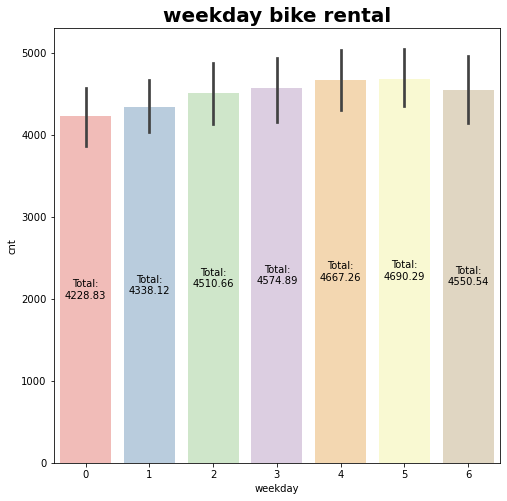

In [22]:
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(x = "weekday", y = "cnt", data =bikedata,palette="Pastel1", ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt='Total:\n%.2f', label_type='center')
plt.title('weekday bike rental', fontsize = 20, fontweight ='bold')

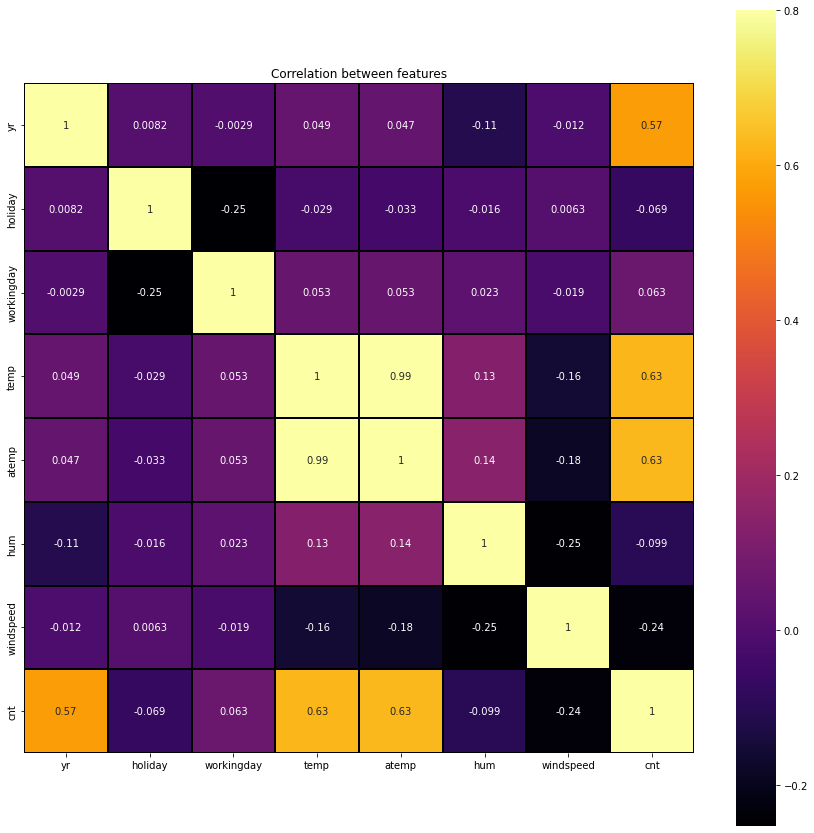

In [24]:
corr = bikedata.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='inferno',linecolor ='black')
plt.title('Correlation between features')
plt.show()

Inference:
- Year 2019, had the highest rentals comapring to 2018
- Season 3rd (Fall) = had the highest number of rentals
- weather sit - Light snow had the lowest number of rentals. Rentals were very high in clear weather sit
- months 6,7,8,9,10 had the highest rentals. also 'fall season in US lasts for 3-4 months i.e, September, October, November
- 4 and 5th day of the week, was crowded with number of rentals.

heat map:
- Heat map shows the difference between casual and registered users on every variables.
- Casual users were less correlated than registered users on the 'yr'
- Casual users are highly negatively correlated than registered ones on workingday. 

## Step3: Creating dummy variables for the linear regression

In [25]:
bikers = pd.get_dummies(bikedata, drop_first=True)
bikers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

## Step4: Linear Regression Model

In [26]:
from sklearn.model_selection import train_test_split
#to have the test and train same rows

#splitting the data
np.random.seed(0)
df_train, df_test = train_test_split(bikers, train_size = 0.70, test_size = 0.30, random_state = 100)

In [27]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [28]:

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0


In [29]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,...,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:xlabel='cnt', ylabel='Density'>

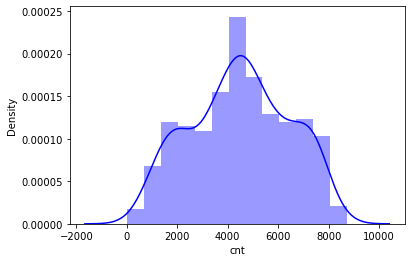

In [30]:
#checking the distribution of the cnt in training set
sns.distplot(df_train.cnt, color="b")

In [31]:
#rescaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
df_train.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0


In [33]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [34]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


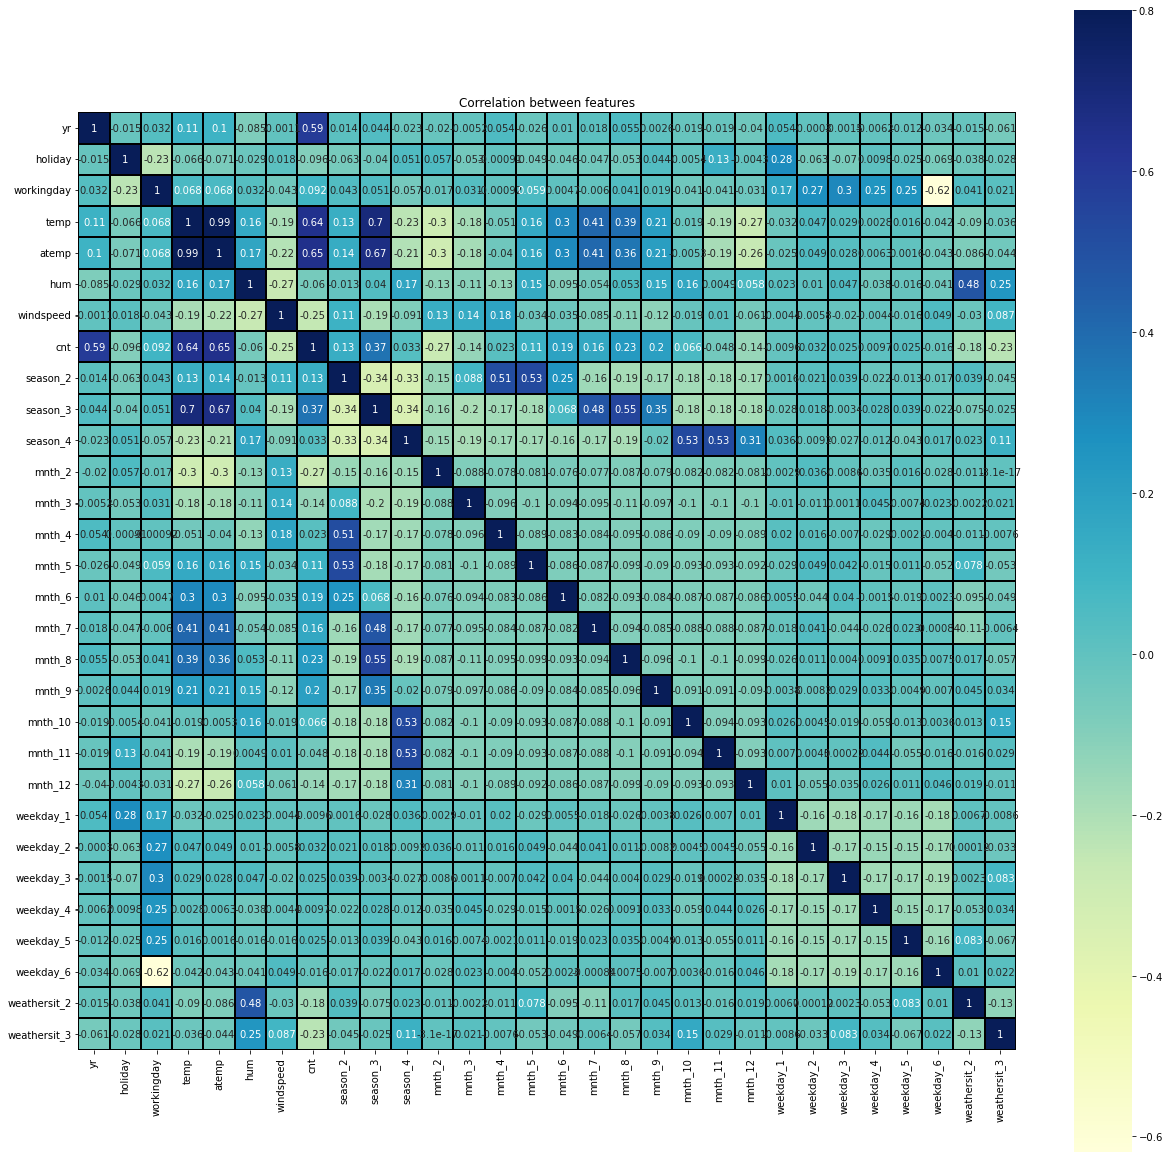

In [36]:
corr = df_train.corr()
plt.figure(figsize=(21,21))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')
plt.show()

## Step4: Building a linear model

In [37]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [38]:
#dividing the test
y_train = df_train.pop('cnt')
X_train = df_train

In [39]:
#before building the model, lets use RFE
#Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
# Running RFE with the output number of the variable equal to 14
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 16)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 14),
 ('season_4', True, 1),
 ('mnth_2', False, 9),
 ('mnth_3', False, 5),
 ('mnth_4', False, 7),
 ('mnth_5', False, 6),
 ('mnth_6', False, 8),
 ('mnth_7', False, 10),
 ('mnth_8', False, 3),
 ('mnth_9', True, 1),
 ('mnth_10', False, 11),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 2),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [42]:
rfe_var = X_train.columns[rfe.support_]
rfe_var

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6'],
      dtype='object')

## Step5: Stats Models

In [44]:
#packages

import statsmodels.api as sm

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[rfe_var]

In [46]:
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,1,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,1,0


In [47]:
#Create constant for the first model
X_train_rfe1 = sm.add_constant(X_train_rfe)

#Create first fitted model
lr1 = sm.OLS(y_train, X_train_rfe1).fit()


In [48]:
lr1.params

const           0.211901
yr              0.229076
holiday        -0.071631
workingday      0.025724
temp            0.568954
hum            -0.170054
windspeed      -0.183957
season_2        0.089625
season_4        0.141483
mnth_9          0.105896
weekday_1      -0.018405
weekday_2      -0.016942
weekday_3      -0.004437
weekday_4      -0.008304
weekday_5       0.002181
weathersit_2   -0.053615
weathersit_3   -0.239369
dtype: float64

In [49]:
#printing the model summary
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.24e-185
Time:                        12:00:17   Log-Likelihood:                 505.20
No. Observations:                 510   AIC:                            -978.4
Df Residuals:                     494   BIC:                            -910.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2119      0.028      7.601   

In [50]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

,Features,VIF
15,weathersit_3,1.17
8,mnth_9,1.21
6,season_2,1.58
7,season_4,1.66
0,yr,2.03
14,weathersit_2,2.12
5,windspeed,3.60
3,temp,8.09
4,hum,15.36
1,holiday,inf


In [52]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [53]:
X_train_rfe = X_train_rfe.drop(["weekday_1"], axis = 1)
#"hum","temp","holiday","workingday","weekday_1","weekday_2","weekday_3","weekday_4","weekday_5"

In [54]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [55]:
#Create constant for 2nd model
X_train_rfe2 = sm.add_constant(X_train_rfe)

#Create first fitted model
lr2 = sm.OLS(y_train, X_train_rfe2).fit()

In [56]:
lr2.params

const           0.211901
yr              0.229076
holiday        -0.090036
workingday      0.007318
temp            0.568954
hum            -0.170054
windspeed      -0.183957
season_2        0.089625
season_4        0.141483
mnth_9          0.105896
weekday_2       0.001463
weekday_3       0.013968
weekday_4       0.010101
weekday_5       0.020586
weathersit_2   -0.053615
weathersit_3   -0.239369
dtype: float64

In [57]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.24e-185
Time:                        12:00:19   Log-Likelihood:                 505.20
No. Observations:                 510   AIC:                            -978.4
Df Residuals:                     494   BIC:                            -910.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2119      0.028      7.601      0.000       0.157       0.267
yr               0.2291      0.008     27.886      0.000       0.213       0.245
holiday         -0.0900      0.027     -3.371      0.001      -0.143      -0.038
workingday       0.0073      0.013      0.551      0.582      -0.019       0.033
temp             0.5690      0.020     28.105      0.000       0.529       0.609
hum             -0.1701      0.038     -4.484      0.000      -0.245      -0.096
windspeed       -0.1840      0.026     -7.100      0.000      -0.235      -0.133
season_2         0.0896      0.010      8.723      0.000       0.069       0.110
season_4         0.1415      0.010     13.502      0.000       0.121       0.162
mnth_9           0.1059      0.016      6.738      0.000       0.075       0.137
weekday_2        0.0015      0.016      0.093      0.926      -0.029       0.032
weekday_3        0.0140      0.015      0.932      0.352      -0.015       0.043
weekday_4        0.0101      0.015      0.652      0.515      -0.020       0.041
weekday_5        0.0206      0.016      1.304      0.193      -0.010       0.052
weathersit_2    -0.0536      0.011     -5.036      0.000      -0.075      -0.033
weathersit_3    -0.2394      0.027     -8.970      0.000      -0.292      -0.187
==============================================================================
Omnibus:                       57.499   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.259
Skew:                          -0.618   Prob(JB):                     1.41e-28
Kurtosis:                       5.124   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,15.36
3,temp,8.09
2,workingday,7.18
5,windspeed,3.60
10,weekday_3,2.18
13,weathersit_2,2.12
0,yr,2.03
9,weekday_2,1.98
11,weekday_4,1.96
12,weekday_5,1.94


In [59]:
X_train_rfe = X_train_rfe.drop(["workingday"], axis = 1)

In [118]:
#Create constant for the 3rd model
X_train_rfe3 = sm.add_constant(X_train_rfe)

#Create first fitted model
lr3 = sm.OLS(y_train, X_train_rfe3).fit()

In [61]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.72e-186
Time:                        12:00:21   Log-Likelihood:                 505.04
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     495   BIC:                            -916.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2138      0.028      7.737      0.000       0.160       0.268
yr               0.2294      0.008     27.994      0.000       0.213       0.245
holiday         -0.0934      0.026     -3.594      0.000      -0.144      -0.042
temp             0.5689      0.020     28.123      0.000       0.529       0.609
hum             -0.1697      0.038     -4.478      0.000      -0.244      -0.095
windspeed       -0.1843      0.026     -7.119      0.000      -0.235      -0.133
season_2         0.0898      0.010      8.748      0.000       0.070       0.110
season_4         0.1415      0.010     13.510      0.000       0.121       0.162
mnth_9           0.1059      0.016      6.743      0.000       0.075       0.137
weekday_2        0.0065      0.013      0.509      0.611      -0.019       0.032
weekday_3        0.0190      0.012      1.593      0.112      -0.004       0.042
weekday_4        0.0150      0.013      1.188      0.235      -0.010       0.040
weekday_5        0.0256      0.013      1.974      0.049       0.000       0.051
weathersit_2    -0.0535      0.011     -5.032      0.000      -0.074      -0.033
weathersit_3    -0.2392      0.027     -8.972      0.000      -0.292      -0.187
==============================================================================
Omnibus:                       58.680   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.315
Skew:                          -0.636   Prob(JB):                     1.37e-28
Kurtosis:                       5.102   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.81
2,temp,8.08
4,windspeed,3.59
12,weathersit_2,2.12
0,yr,2.01
6,season_4,1.66
5,season_2,1.58
9,weekday_3,1.36
8,weekday_2,1.30
10,weekday_4,1.28


In [63]:
#weekday_1 removing due to high p-value

X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

In [119]:
#Create constant for the 4th model
X_train_rfe4 = sm.add_constant(X_train_rfe)

#Create first fitted model
lr4 = sm.OLS(y_train, X_train_rfe4).fit()

In [65]:
lr4.params

const           0.116336
yr              0.233174
holiday        -0.094494
temp            0.546875
windspeed      -0.151596
season_2        0.087299
season_4        0.132242
mnth_9          0.100359
weekday_2       0.006467
weekday_3       0.019054
weekday_4       0.017133
weekday_5       0.028742
weathersit_2   -0.080863
weathersit_3   -0.285035
dtype: float64

In [66]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.42e-183
Time:                        12:00:22   Log-Likelihood:                 494.92
No. Observations:                 510   AIC:                            -961.8
Df Residuals:                     496   BIC:                            -902.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1163      0.017      6.708      0.000       0.082       0.150
yr               0.2332      0.008     28.081      0.000       0.217       0.249
holiday         -0.0945      0.026     -3.568      0.000      -0.147      -0.042
temp             0.5469      0.020     27.351      0.000       0.508       0.586
windspeed       -0.1516      0.025     -5.990      0.000      -0.201      -0.102
season_2         0.0873      0.010      8.359      0.000       0.067       0.108
season_4         0.1322      0.010     12.641      0.000       0.112       0.153
mnth_9           0.1004      0.016      6.291      0.000       0.069       0.132
weekday_2        0.0065      0.013      0.498      0.619      -0.019       0.032
weekday_3        0.0191      0.012      1.569      0.117      -0.005       0.043
weekday_4        0.0171      0.013      1.330      0.184      -0.008       0.042
weekday_5        0.0287      0.013      2.183      0.030       0.003       0.055
weathersit_2    -0.0809      0.009     -9.107      0.000      -0.098      -0.063
weathersit_3    -0.2850      0.025    -11.359      0.000      -0.334      -0.236
==============================================================================
Omnibus:                       55.397   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.261
Skew:                          -0.617   Prob(JB):                     5.68e-26
Kurtosis:                       4.988   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.10
3,windspeed,3.15
0,yr,2.00
4,season_2,1.57
11,weathersit_2,1.50
5,season_4,1.38
8,weekday_3,1.34
7,weekday_2,1.28
10,weekday_5,1.27
9,weekday_4,1.26


In [68]:
#weekday_3 removing due to high p-value

X_train_rfe = X_train_rfe.drop(["weekday_3"], axis = 1)

In [69]:
#Create constant for the 5th model
X_train_rfe5 = sm.add_constant(X_train_rfe)

#Create first fitted model
lr5 = sm.OLS(y_train, X_train_rfe5).fit()

In [70]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          7.92e-184
Time:                        12:00:25   Log-Likelihood:                 493.65
No. Observations:                 510   AIC:                            -961.3
Df Residuals:                     497   BIC:                            -906.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1213      0.017      7.105      0.000       0.088       0.155
yr               0.2331      0.008     28.030      0.000       0.217       0.249
holiday         -0.0981      0.026     -3.715      0.000      -0.150      -0.046
temp             0.5475      0.020     27.350      0.000       0.508       0.587
windspeed       -0.1528      0.025     -6.031      0.000      -0.203      -0.103
season_2         0.0877      0.010      8.393      0.000       0.067       0.108
season_4         0.1317      0.010     12.575      0.000       0.111       0.152
mnth_9           0.1011      0.016      6.334      0.000       0.070       0.133
weekday_2        0.0014      0.013      0.110      0.913      -0.023       0.026
weekday_4        0.0121      0.012      0.968      0.334      -0.012       0.037
weekday_5        0.0237      0.013      1.855      0.064      -0.001       0.049
weathersit_2    -0.0806      0.009     -9.070      0.000      -0.098      -0.063
weathersit_3    -0.2820      0.025    -11.254      0.000      -0.331      -0.233
==============================================================================
Omnibus:                       58.308   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.014
Skew:                          -0.653   Prob(JB):                     8.69e-27
Kurtosis:                       4.986   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.92
3,windspeed,3.12
0,yr,2.00
4,season_2,1.56
10,weathersit_2,1.49
5,season_4,1.38
6,mnth_9,1.21
7,weekday_2,1.21
9,weekday_5,1.21
8,weekday_4,1.20


In [72]:
#weekday_4 removing due to high p-value
X_train_rfe = X_train_rfe.drop(["weekday_4"], axis = 1)

In [120]:
#Create constant for the 6th model
X_train_rfe6 = sm.add_constant(X_train_rfe)

#Create first fitted model
lr6 = sm.OLS(y_train, X_train_rfe6).fit()

In [74]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.24e-185
Time:                        12:00:27   Log-Likelihood:                 493.17
No. Observations:                 510   AIC:                            -962.3
Df Residuals:                     498   BIC:                            -911.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1238      0.017      7.331      0.000       0.091       0.157
yr               0.2330      0.008     28.025      0.000       0.217       0.249
holiday         -0.0983      0.026     -3.723      0.000      -0.150      -0.046
temp             0.5475      0.020     27.352      0.000       0.508       0.587
windspeed       -0.1530      0.025     -6.038      0.000      -0.203      -0.103
season_2         0.0875      0.010      8.374      0.000       0.067       0.108
season_4         0.1314      0.010     12.554      0.000       0.111       0.152
mnth_9           0.1015      0.016      6.361      0.000       0.070       0.133
weekday_2       -0.0008      0.012     -0.063      0.949      -0.025       0.024
weekday_5        0.0216      0.013      1.713      0.087      -0.003       0.046
weathersit_2    -0.0810      0.009     -9.113      0.000      -0.098      -0.064
weathersit_3    -0.2817      0.025    -11.243      0.000      -0.331      -0.232
==============================================================================
Omnibus:                       58.408   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.948
Skew:                          -0.657   Prob(JB):                     1.48e-26
Kurtosis:                       4.967   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.83
3,windspeed,3.08
0,yr,2.00
4,season_2,1.56
9,weathersit_2,1.49
5,season_4,1.38
6,mnth_9,1.21
7,weekday_2,1.18
8,weekday_5,1.18
10,weathersit_3,1.09


In [76]:
#weekday_5 removing due to high p-value
X_train_rfe = X_train_rfe.drop(["weekday_5"], axis = 1)

In [121]:
#Create constant for the 7th model
X_train_rfe7 = sm.add_constant(X_train_rfe)

#Create first fitted model
lr7 = sm.OLS(y_train, X_train_rfe7).fit()

In [78]:
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     245.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.20e-185
Time:                        12:00:30   Log-Likelihood:                 491.67
No. Observations:                 510   AIC:                            -961.3
Df Residuals:                     499   BIC:                            -914.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1268      0.017      7.539      0.000       0.094       0.160
yr               0.2328      0.008     27.944      0.000       0.216       0.249
holiday         -0.0997      0.026     -3.770      0.000      -0.152      -0.048
temp             0.5483      0.020     27.346      0.000       0.509       0.588
windspeed       -0.1532      0.025     -6.037      0.000      -0.203      -0.103
season_2         0.0869      0.010      8.302      0.000       0.066       0.107
season_4         0.1306      0.010     12.467      0.000       0.110       0.151
mnth_9           0.1010      0.016      6.317      0.000       0.070       0.132
weekday_2       -0.0041      0.012     -0.331      0.741      -0.028       0.020
weathersit_2    -0.0798      0.009     -8.988      0.000      -0.097      -0.062
weathersit_3    -0.2841      0.025    -11.338      0.000      -0.333      -0.235
==============================================================================
Omnibus:                       57.529   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.762
Skew:                          -0.652   Prob(JB):                     7.29e-26
Kurtosis:                       4.935   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.75
3,windspeed,3.07
0,yr,2.00
4,season_2,1.56
8,weathersit_2,1.48
5,season_4,1.38
6,mnth_9,1.20
7,weekday_2,1.15
9,weathersit_3,1.08
1,holiday,1.04


In [80]:
#weekday_5 removing due to high p-value
X_train_rfe = X_train_rfe.drop(["weekday_2"], axis = 1)

In [122]:
#Create constant for 8th model
X_train_rfe8 = sm.add_constant(X_train_rfe)

#Create first fitted model
lr8 = sm.OLS(y_train, X_train_rfe8).fit()

In [82]:
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.37e-186
Time:                        12:00:33   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1264      0.017      7.541      0.000       0.093       0.159
yr               0.2328      0.008     27.973      0.000       0.216       0.249
holiday         -0.0992      0.026     -3.761      0.000      -0.151      -0.047
temp             0.5480      0.020     27.381      0.000       0.509       0.587
windspeed       -0.1533      0.025     -6.045      0.000      -0.203      -0.103
season_2         0.0868      0.010      8.307      0.000       0.066       0.107
season_4         0.1306      0.010     12.476      0.000       0.110       0.151
mnth_9           0.1011      0.016      6.327      0.000       0.070       0.132
weathersit_2    -0.0797      0.009     -8.995      0.000      -0.097      -0.062
weathersit_3    -0.2838      0.025    -11.344      0.000      -0.333      -0.235
==============================================================================
Omnibus:                       57.277   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.021
Skew:                          -0.648   Prob(JB):                     6.40e-26
Kurtosis:                       4.945   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,yr,2.00
4,season_2,1.56
7,weathersit_2,1.48
5,season_4,1.38
6,mnth_9,1.20
8,weathersit_3,1.08
1,holiday,1.03


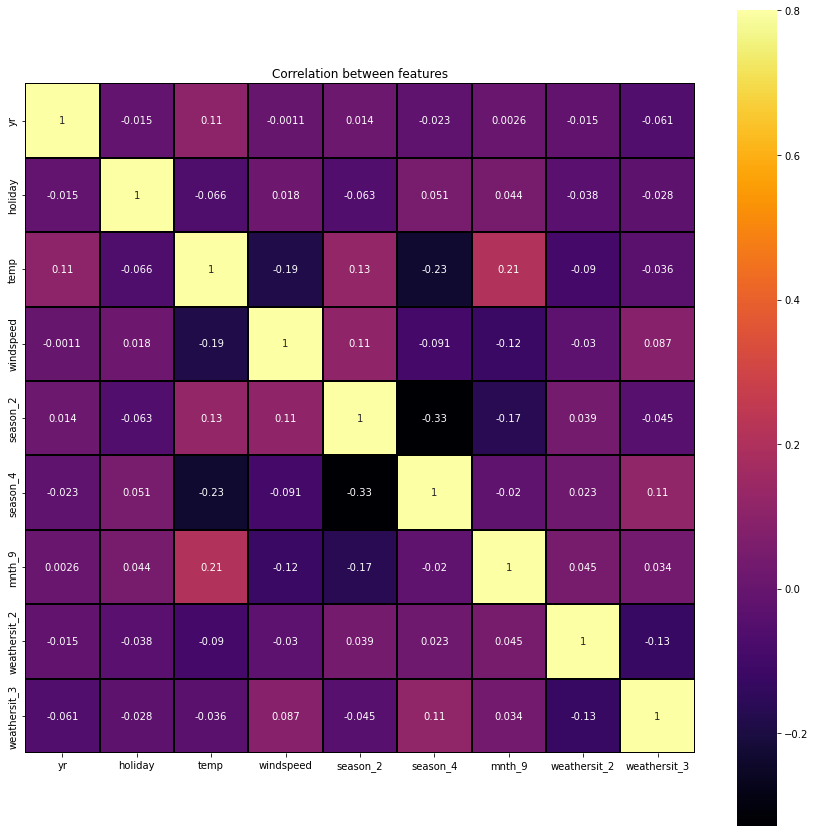

In [107]:
corr = X_train_rfe.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='inferno',linecolor ='black')
plt.title('Correlation between features')
plt.show()

### Trained model
- 8th iterated model is the final model 
- Final trained model has r2 = 83% without any high p-values, almost equal to zero
- VIF values for feautres are less than 5%


#### Line Equation of the model<br>
cnt = 0.126 + (**yr** × 0.232786) - (**holiday** × 0.099211) + (**temp** × 0.548046) − (**windspeed** × 0.153276) + (**season2** × 0.086848) + (**season4** ×0.130574) + (**mnth9** × 0.101076) - (**weathersit2** × 0.079747) − (**weathersit3** × 0.283837)


In [85]:
#error check
y_train_pred = lr8.predict(X_train_rfe8)

Text(0.5, 0, 'Errors')

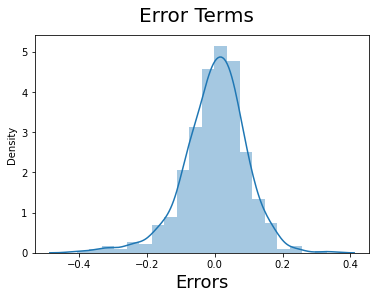

In [86]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

__Observation__
- Error terms are normally distributed with mean Zero

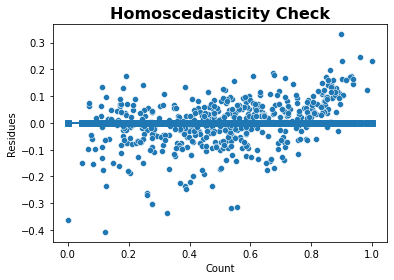

In [130]:
sns.scatterplot(y_train,res)
plt.plot(y_train,(y_train - y_train), '-s')
plt.xlabel('Count')
plt.ylabel('Residues')
plt.title("Homoscedasticity Check",fontsize=16,fontweight="bold")
plt.show()

In [131]:
from statsmodels.stats.stattools import durbin_watson

In [132]:
durbin_watson(lr8.resid)

#linear regression on No autocorrelation holds true

2.0884175380870484

In [89]:
num_vars

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [90]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [91]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,1,0,...,0,0,0,0,0,1,0,0,0,0


In [92]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
#dividing into X_test, y_test
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [97]:
#Selecting the variables that were part of final model.
rfe_test=X_train_rfe.columns
X_test=X_test[rfe_test]
# Adding constant variable to test dataframe
X_test_rfe8 = sm.add_constant(X_test)
X_test_rfe8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weathersit_2  219 non-null    uint8  
 9   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.3 KB


In [133]:
#making predictions using the final model lr8
y_pred = lr8.predict(X_test_rfe8)

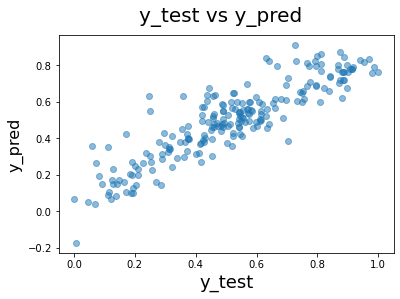

In [99]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
ax.plot(y_test, y_pred, color="k", lw=3)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [100]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7860370871256668

In [101]:
r2 = 0.7860370871256668

In [102]:
X_test.shape

(219, 9)

In [103]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7768233731741405

In [134]:
#Model evaluation through RMSE

from sklearn.metrics import mean_squared_error
from math import sqrt

In [135]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.11016179979405447


### __Final conclusion__

- We have a good model that predicts the factors which impacts boom bikes rentals

- Equation of the model comes out to be
  cnt = 0.126 + (**yr** × 0.232786) - (**holiday** × 0.099211) + (**temp** × 0.548046) − (**windspeed** × 0.153276) + (**season2** × 0.086848) + (**season4** ×0.130574) + (**mnth9** × 0.101076) - (**weathersit2** × 0.079747) − (**weathersit3** × 0.283837)
  
- Which variables are significant in predicting the demand for shared bikes.
  - temp
  - Yr
  - Mnth_9
  - Windspeed

  
- Evaluating our model with test data gave us good values for 
  - __*R-Squared          : 0.7860370871256668*__
  - __*Adjusted R-squared : 0.7768233731741405*__
  - __*RMSE               : 0.11016179979405447*__


__How well those variables describe the bike demands__

Temp: Each unit increase in temp will increase book bike rentals byt __0.54__ fold <br>
windspeed: Each unit increase will decrease the boom bike rentals by __0.153__ fold <br>
Summer: Each unit increase in summer increases the boom bike rentals by __0.08__ fold <br>